**Counter-Strike (CS)** is a popular series of tactical first-person shooter (FPS) video games that have been enjoyed by gamers worldwide for many years. The series originated as a modification for the popular game Half-Life and quickly gained its own dedicated following. Here's an overview of Counter-Strike:

**Gameplay Overview:**

Counter-Strike is primarily a multiplayer game where two teams, the Counter-Terrorists (CTs) and the Terrorists (Ts), compete against each other.

The objective of each round varies based on the game mode, but the primary goals include:

**Counter-Terrorists:** Prevent the Terrorists from achieving their objectives, such as defusing a bomb or rescuing hostages.

**Terrorists:** Achieve their objectives, which may include planting a bomb at a designated site or holding hostages.
Rounds are relatively short, typically lasting a few minutes, and players have only one life per round. When a player is eliminated, they must wait until the next round to respawn.

**Key Features:**

**Weapons:** Players can purchase and use a wide variety of firearms, grenades, and equipment. The choice of weaponry is an essential strategic element in the game.

**Economy:** Players earn in-game money based on their performance in the previous rounds. Money is used to buy weapons and equipment for the next round.

**Maps:** Counter-Strike features a range of maps, each with its own layout and objectives. Popular maps include Dust II, Mirage, Inferno, and more.

**Teamwork:** Successful gameplay in Counter-Strike heavily relies on teamwork, communication, and strategy. Players often coordinate their actions with their teammates to achieve objectives.

**Competitive Play:** Counter-Strike is well-known for its competitive scene, with professional esports tournaments held worldwide.

**Popular Game Modes:**

**Bomb Defusal (de_):** In this mode, Terrorists attempt to plant a bomb at one of the designated bomb sites, while Counter-Terrorists aim to prevent the bomb from being planted or defuse it if it's planted.

**Hostage Rescue (cs_):** In hostage rescue mode, Counter-Terrorists must rescue hostages held by the Terrorists, while the Terrorists aim to prevent the rescues.

**Arms Race:** A fast-paced mode where players cycle through a series of weapons, aiming to be the first to get a kill with each weapon.

**Deathmatch:** A mode where players respawn quickly and aim to get as many kills as possible within a set time limit.

**Wingman:** A 2v2 competitive mode with smaller maps and shorter rounds.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.preprocessing

In [3]:
data = pd.read_csv('..\Data\csgo_round_snapshots.csv')

In [4]:
data.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0       0.0      0.0    4000.0  ...                  0.0   
1     400.0    300.0     600.0  ...                  0.0   
2     294.0    200.0     750.0  ...                  0.0   
3     294.0    200.0     750.0  ...                  0.0   
4     192.0      0.0   18350.0  ...                  0.0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                      0.0                     0.0   
1                      0.0                     2.0   
2                      0.0                     2.0   
3                      0.0                     0.0   
4                      0.0                     0.0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
0                      0.0                     0.0            CT  
1                      0.0                     0.0            CT  
2                      0.0                     0.0            CT  
3                      0.0                     0.0            CT  
4                      0.0                     0.0            CT  

[5 rows x 97 columns]

In [5]:
data.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [6]:
data.shape

(122410, 97)

Target variable is `round_winner`

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [8]:
# Adjust display settings
pd.set_option('display.max_rows', 100)        # Show all rows
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.width', 1000)           # Set display width
pd.set_option('display.max_colwidth', None)    # No limit on column width

In [9]:
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')
# pd.reset_option('display.max_colwidth')

In [10]:
df_categorical = data.select_dtypes(include=['object'])
df_numerical = data.select_dtypes(exclude=['object'])
df_categorical.head()

map round_winner
0  de_dust2           CT
1  de_dust2           CT
2  de_dust2           CT
3  de_dust2           CT
4  de_dust2           CT

In [11]:
df_categorical.nunique()

map             8
round_winner    2
dtype: int64

In [12]:
df_categorical.value_counts()

map          round_winner
de_inferno   T               13001
de_dust2     T               11986
de_inferno   CT              10810
de_nuke      CT              10214
de_dust2     CT              10158
de_mirage    T                9432
             CT               9144
de_nuke      T                8811
de_train     CT               7310
de_overpass  T                7055
             CT               7026
de_train     T                6181
de_vertigo   T                5898
             CT               5239
de_cache     CT                103
             T                  42
Name: count, dtype: int64

round_winner
T     62406
CT    60004
Name: count, dtype: int64


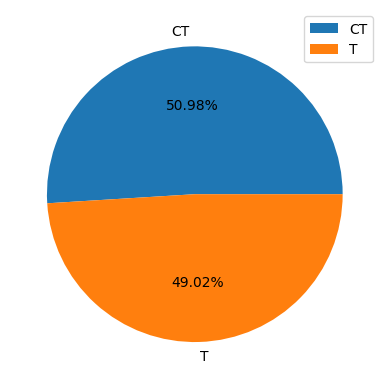

In [13]:
print(df_categorical.round_winner.value_counts())
plt.pie(df_categorical.round_winner.value_counts(), labels=['CT', 'T'], autopct='%1.2f%%')
plt.legend()
plt.show()

In [14]:
# The target variable is round_winner and This is a approximately balanced dataset

In [15]:
df_categorical['map'].value_counts()

map
de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: count, dtype: int64

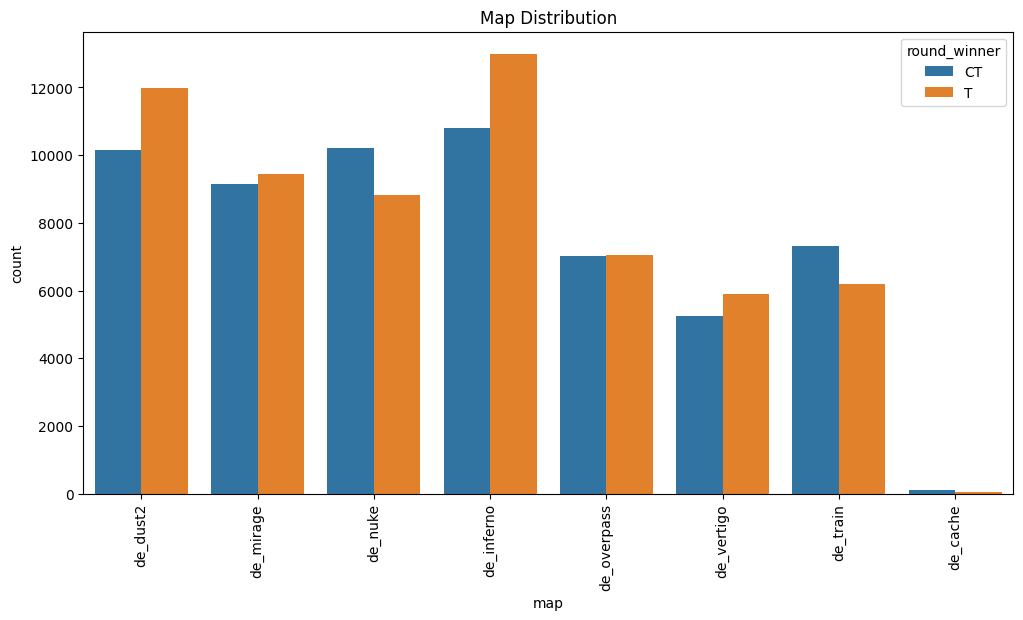

In [16]:
plt.figure(figsize=(12, 6)) 
plt.xticks(rotation=90) 
plt.title('Map Distribution')
sns.countplot(x='map', data=df_categorical, hue='round_winner') 
plt.show()

In [17]:
# The above plot shows that de_dust2 and de_inferno results is considerable more victory for 'T' than 'CT' and 
# the rest has either 'CT' winning or nearly equal.

# From the above plot, we can see that the map distribution is not uniform. Some maps have more rounds than others. 
# This could be a potential source of bias in the model. We can address this by using stratified sampling.

In [18]:
df_num_with_target = df_numerical.join(df_categorical['round_winner'].map({'CT': 1,'T':0}))
df_num_with_target.head()

time_left  ct_score  t_score  bomb_planted  ct_health  t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  t_weapon_bizon  ct_weapon_cz75auto  t_weapon_cz75auto  ct_weapon_elite  t_weapon_elite  ct_weapon_famas  t_weapon_famas  ct_weapon_g3sg1  t_weapon_g3sg1  ct_weapon_galilar  t_weapon_galilar  ct_weapon_glock  t_weapon_glock  ct_weapon_m249  t_weapon_m249  ct_weapon_m4a1s  t_weapon_m4a1s  ct_weapon_m4a4  t_weapon_m4a4  ct_weapon_mac10  t_weapon_mac10  ct_weapon_mag7  t_weapon_mag7  ct_weapon_mp5sd  t_weapon_mp5sd  ct_weapon_mp7  t_weapon_mp7  ct_weapon_mp9  t_weapon_mp9  ct_weapon_negev  t_weapon_negev  ct_weapon_nova  t_weapon_nova  ct_weapon_p90  t_weapon_p90  ct_weapon_r8revolver  t_weapon_r8revolver  ct_weapon_sawedoff  t_weapon_sawedoff  ct_weapon_scar20  t_weapon_scar20  ct_weapon_sg553  \
0     175.00       0.0      0.0         False      500.0     500.0       0.0      0.0    4000.0   4000.0         0.0        0.0             0.0               5.0              5.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0             0.0                 0.0                0.0              0.0             0.0              0.0             0.0              0.0             0.0                0.0               0.0              0.0             5.0             0.0            0.0              0.0             0.0             0.0            0.0              0.0             0.0             0.0            0.0              0.0             0.0            0.0           0.0            0.0           0.0              0.0             0.0             0.0            0.0            0.0           0.0                   0.0                  0.0                 0.0                0.0               0.0              0.0              0.0   
1     156.03       0.0      0.0         False      500.0     500.0     400.0    300.0     600.0    650.0         0.0        0.0             1.0               5.0              5.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0             0.0                 0.0                0.0              0.0             0.0              0.0             0.0              0.0             0.0                0.0               0.0              0.0             5.0             0.0            0.0              0.0             0.0             0.0            0.0              0.0             0.0             0.0            0.0              0.0             0.0            0.0           0.0            0.0           0.0              0.0             0.0             0.0            0.0            0.0           0.0                   0.0                  0.0                 0.0                0.0               0.0              0.0              0.0   
2      96.03       0.0      0.0         False      391.0     400.0     294.0    200.0     750.0    500.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0             0.0                 0.0                0.0              0.0             0.0              0.0             0.0              0.0             0.0                0.0               0.0              0.0             4.0             0.0            0.0              0.0             0.0             0.0            0.0              0.0             0.0             0.0            0.0              0.0             0.0            0.0           0.0            0.0           0.0              0.0             0.0             0.0            0.0            0.0           0.0                   0.0                  0.0                 0.0                0.0               0.0              0.0              0.0   
3      76.03       0.0      0.0         False  

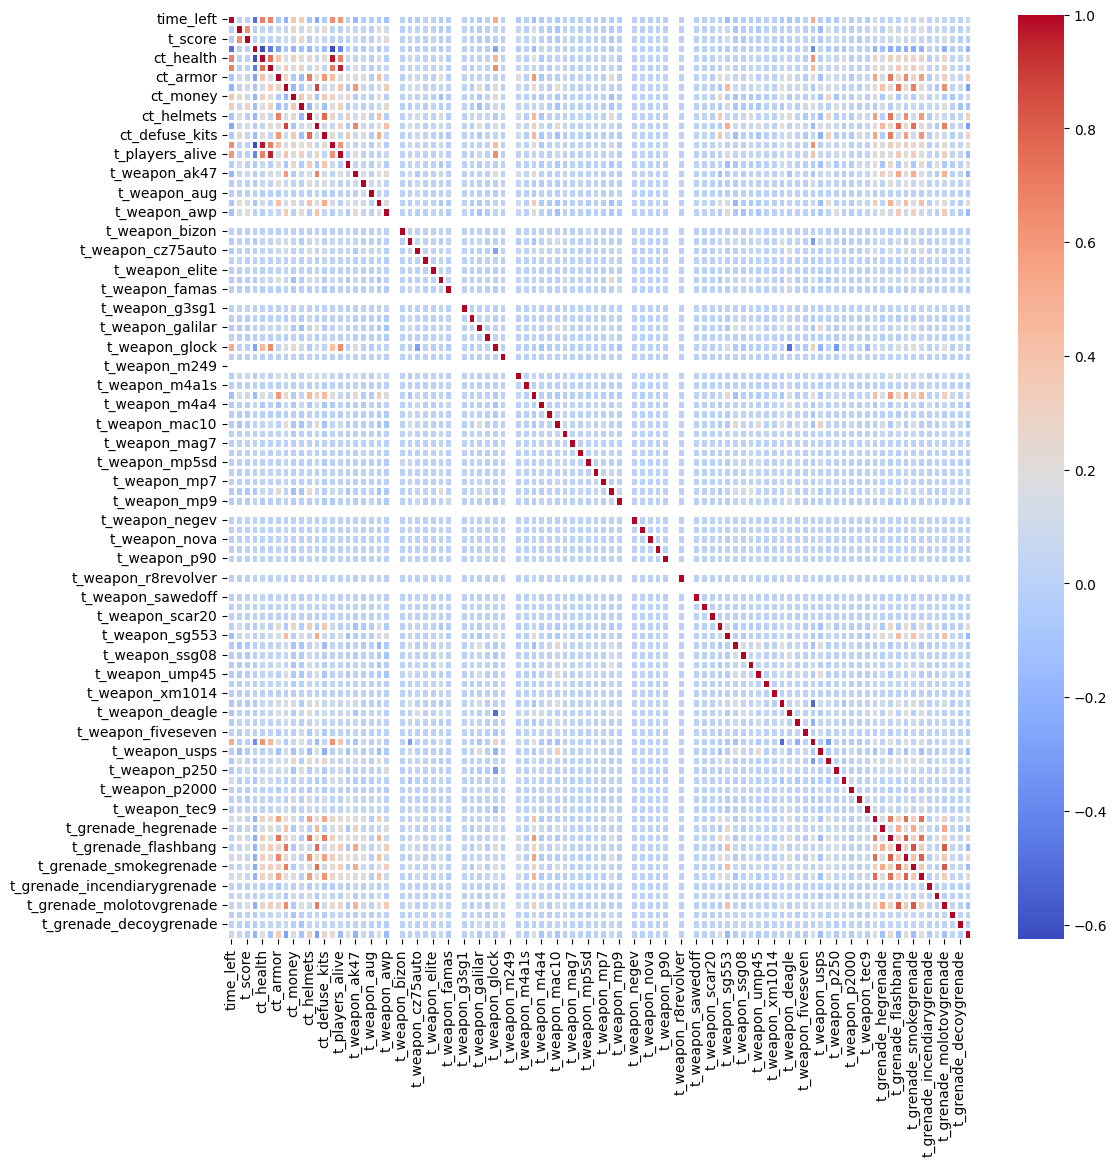

In [19]:
df_numerical_corr = df_num_with_target.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(df_numerical_corr, cmap='coolwarm', linewidths=2)
plt.show()

In [20]:
# The heatmap shows that there are no strong correlations between the numerical features and the target variable.
# It also shows that there are no strong correlations between the numerical features themselves.
# But there are some features that are highly correlated with each other. We can remove these features to reduce multicollinearity.

In [21]:
pd.DataFrame(df_numerical_corr)['round_winner'].sort_values(ascending=False).abs().round(3)

round_winner                    1.000
ct_armor                        0.336
ct_helmets                      0.308
ct_defuse_kits                  0.292
ct_grenade_flashbang            0.254
ct_players_alive                0.217
ct_grenade_smokegrenade         0.210
ct_weapon_awp                   0.199
ct_health                       0.191
ct_weapon_m4a4                  0.178
ct_grenade_hegrenade            0.169
ct_grenade_incendiarygrenade    0.169
ct_weapon_ak47                  0.167
ct_weapon_sg553                 0.164
ct_weapon_usps                  0.153
ct_money                        0.129
ct_weapon_aug                   0.081
ct_grenade_molotovgrenade       0.080
time_left                       0.069
ct_weapon_mp9                   0.064
ct_score                        0.057
ct_weapon_famas                 0.050
ct_weapon_p250                  0.050
ct_weapon_m4a1s                 0.048
ct_weapon_tec9                  0.043
t_weapon_deagle                 0.035
ct_weapon_ga

In [22]:
# we can delete the features which have no correlation with the target variable.
def drop_features(df, threshold: float)-> pd.DataFrame:
    '''
    drops the features which have correlation with the target variable less than the threshold
    '''
    df_copy = df.copy()
    for col in df_copy.columns:
        if abs(df_numerical_corr['round_winner'][col]) < threshold:
            df_copy.drop(col, axis=1, inplace=True)
    print(df_copy.shape)
    return df_copy

drop_features(df_numerical, 0.1)

(122410, 33)


bomb_planted  ct_health  ct_armor  t_armor  ct_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  ct_weapon_g3sg1  t_weapon_m249  ct_weapon_m4a4  ct_weapon_negev  ct_weapon_r8revolver  ct_weapon_sawedoff  ct_weapon_sg553  t_weapon_sg553  ct_weapon_usps  t_weapon_usps  ct_grenade_hegrenade  t_grenade_hegrenade  ct_grenade_flashbang  t_grenade_flashbang  ct_grenade_smokegrenade  t_grenade_smokegrenade  ct_grenade_incendiarygrenade  t_grenade_molotovgrenade
0              False      500.0       0.0      0.0    4000.0         0.0        0.0             0.0               5.0              5.0             0.0            0.0            0.0           0.0              0.0              0.0            0.0             0.0              0.0                   0.0                 0.0              0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     0.0                           0.0                       0.0
1              False      500.0     400.0    300.0     600.0         0.0        0.0             1.0               5.0              5.0             0.0            0.0            0.0           0.0              0.0              0.0            0.0             0.0              0.0                   0.0                 0.0              0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     2.0                           0.0                       0.0
2              False      391.0     294.0    200.0     750.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0           0.0              0.0              0.0            0.0             0.0              0.0                   0.0                 0.0              0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     2.0                           0.0                       0.0
3              False      391.0     294.0    200.0     750.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0           0.0              0.0              0.0            0.0             0.0              0.0                   0.0                 0.0              0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     0.0                           0.0                       0.0
4              False      500.0     192.0      0.0   18350.0         0.0        0.0             1.0               5.0              5.0             0.0            0.0            0.0           0.0              0.0              0.0            0.0             0.0              0.0                   0.0                 0.0              0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     0.0                           0.0                       0.0
...              ...        ...       ...      ...       ...         ...        ...             ...               ...              ...             ...            ...            ...           ...              ...              ...            ...             ...              ...                   ...                 ...              ...             ...             ...            ...                   ...                  ...                   ...                  ...                      ...                     ...                           ...                 

In [23]:
drop_features(df_numerical, 0.05)


(122410, 46)


time_left  ct_score  bomb_planted  ct_health  t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  ct_weapon_g3sg1  t_weapon_galilar  t_weapon_glock  t_weapon_m249  ct_weapon_m4a4  t_weapon_m4a4  t_weapon_mac10  ct_weapon_mp9  ct_weapon_negev  ct_weapon_r8revolver  ct_weapon_sawedoff  ct_weapon_sg553  t_weapon_sg553  t_weapon_ump45  ct_weapon_usps  t_weapon_usps  ct_grenade_hegrenade  t_grenade_hegrenade  ct_grenade_flashbang  t_grenade_flashbang  ct_grenade_smokegrenade  t_grenade_smokegrenade  ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  ct_grenade_molotovgrenade  t_grenade_molotovgrenade
0          175.00       0.0         False      500.0     500.0       0.0      0.0    4000.0   4000.0         0.0        0.0             0.0               5.0              5.0             0.0            0.0            0.0            0.0           0.0              0.0              0.0               0.0             5.0            0.0             0.0            0.0             0.0            0.0              0.0                   0.0                 0.0              0.0             0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     0.0                           0.0                          0.0                        0.0                       0.0
1          156.03       0.0         False      500.0     500.0     400.0    300.0     600.0    650.0         0.0        0.0             1.0               5.0              5.0             0.0            0.0            0.0            0.0           0.0              0.0              0.0               0.0             5.0            0.0             0.0            0.0             0.0            0.0              0.0                   0.0                 0.0              0.0             0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     2.0                           0.0                          0.0                        0.0                       0.0
2           96.03       0.0         False      391.0     400.0     294.0    200.0     750.0    500.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0            0.0           0.0              0.0              0.0               0.0             4.0            0.0             0.0            0.0             0.0            0.0              0.0                   0.0                 0.0              0.0             0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     2.0                           0.0                          0.0                        0.0                       0.0
3           76.03       0.0         False      391.0     400.0     294.0    200.0     750.0    500.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0            0.0           0.0              0.0              0.0               0.0             3.0            0.0             0.0            0.0             0.0            0.0              0.0                   0.0                 0.0              0.0             0.0             0.0             4.0            0.0                   0.0                  0.0                   0.0                  0.0                      0.0                     0.0                           0.0                          0.0                        0.0                       0.0
4          174.97       1.0         False      500.0     500.0     192.0      0.0   18350.0  10750.0   

In [24]:
drop_features(df_numerical, 0.01)

(122410, 75)


time_left  ct_score  t_score  bomb_planted  ct_health  t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  ct_weapon_cz75auto  ct_weapon_elite  t_weapon_elite  ct_weapon_famas  t_weapon_famas  ct_weapon_g3sg1  ct_weapon_galilar  t_weapon_galilar  ct_weapon_glock  t_weapon_glock  t_weapon_m249  ct_weapon_m4a1s  t_weapon_m4a1s  ct_weapon_m4a4  t_weapon_m4a4  t_weapon_mac10  ct_weapon_mag7  ct_weapon_mp5sd  t_weapon_mp5sd  t_weapon_mp7  ct_weapon_mp9  t_weapon_mp9  ct_weapon_negev  ct_weapon_r8revolver  ct_weapon_sawedoff  ct_weapon_sg553  t_weapon_sg553  ct_weapon_ssg08  ct_weapon_ump45  t_weapon_ump45  ct_weapon_deagle  t_weapon_deagle  ct_weapon_fiveseven  t_weapon_fiveseven  ct_weapon_usps  t_weapon_usps  ct_weapon_p250  t_weapon_p250  ct_weapon_p2000  t_weapon_p2000  ct_weapon_tec9  \
0          175.00       0.0      0.0         False      500.0     500.0       0.0      0.0    4000.0   4000.0         0.0        0.0             0.0               5.0              5.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0                 0.0              0.0             0.0              0.0             0.0              0.0                0.0               0.0              0.0             5.0            0.0              0.0             0.0             0.0            0.0             0.0             0.0              0.0             0.0           0.0            0.0           0.0              0.0                   0.0                 0.0              0.0             0.0              0.0              0.0             0.0               0.0              0.0                  0.0                 0.0             4.0            0.0             0.0            0.0              1.0             0.0             0.0   
1          156.03       0.0      0.0         False      500.0     500.0     400.0    300.0     600.0    650.0         0.0        0.0             1.0               5.0              5.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0                 0.0              0.0             0.0              0.0             0.0              0.0                0.0               0.0              0.0             5.0            0.0              0.0             0.0             0.0            0.0             0.0             0.0              0.0             0.0           0.0            0.0           0.0              0.0                   0.0                 0.0              0.0             0.0              0.0              0.0             0.0               0.0              0.0                  0.0                 0.0             4.0            0.0             0.0            0.0              1.0             0.0             0.0   
2           96.03       0.0      0.0         False      391.0     400.0     294.0    200.0     750.0    500.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0                 0.0              0.0             0.0              0.0             0.0              0.0                0.0               0.0              0.0             4.0            0.0              0.0             0.0             0.0            0.0             0.0             0.0              0.0             0.0           0.0            0.0           0.0              0.0                   0.0                 0.0              0.0             0.0              0.0              0.0             0.0               0.0              0.0                  0.0                 0.0             4.0            0.0             0.0            0.0              0.0             0.0             0.0   
3           76.03       0.0      0.0         False      391.0     400.0     294.

In [25]:
# Since the values of correlation with the target variable is much low corresponding to the threshold of 0.01. We can drop those columns and 
# the remaining columns can be used for further analysis. 
df_numerical = drop_features(df_numerical, 0.01)
df_numerical.head()

(122410, 75)


time_left  ct_score  t_score  bomb_planted  ct_health  t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  ct_weapon_cz75auto  ct_weapon_elite  t_weapon_elite  ct_weapon_famas  t_weapon_famas  ct_weapon_g3sg1  ct_weapon_galilar  t_weapon_galilar  ct_weapon_glock  t_weapon_glock  t_weapon_m249  ct_weapon_m4a1s  t_weapon_m4a1s  ct_weapon_m4a4  t_weapon_m4a4  t_weapon_mac10  ct_weapon_mag7  ct_weapon_mp5sd  t_weapon_mp5sd  t_weapon_mp7  ct_weapon_mp9  t_weapon_mp9  ct_weapon_negev  ct_weapon_r8revolver  ct_weapon_sawedoff  ct_weapon_sg553  t_weapon_sg553  ct_weapon_ssg08  ct_weapon_ump45  t_weapon_ump45  ct_weapon_deagle  t_weapon_deagle  ct_weapon_fiveseven  t_weapon_fiveseven  ct_weapon_usps  t_weapon_usps  ct_weapon_p250  t_weapon_p250  ct_weapon_p2000  t_weapon_p2000  ct_weapon_tec9  ct_grenade_hegrenade  \
0     175.00       0.0      0.0         False      500.0     500.0       0.0      0.0    4000.0   4000.0         0.0        0.0             0.0               5.0              5.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0                 0.0              0.0             0.0              0.0             0.0              0.0                0.0               0.0              0.0             5.0            0.0              0.0             0.0             0.0            0.0             0.0             0.0              0.0             0.0           0.0            0.0           0.0              0.0                   0.0                 0.0              0.0             0.0              0.0              0.0             0.0               0.0              0.0                  0.0                 0.0             4.0            0.0             0.0            0.0              1.0             0.0             0.0                   0.0   
1     156.03       0.0      0.0         False      500.0     500.0     400.0    300.0     600.0    650.0         0.0        0.0             1.0               5.0              5.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0                 0.0              0.0             0.0              0.0             0.0              0.0                0.0               0.0              0.0             5.0            0.0              0.0             0.0             0.0            0.0             0.0             0.0              0.0             0.0           0.0            0.0           0.0              0.0                   0.0                 0.0              0.0             0.0              0.0              0.0             0.0               0.0              0.0                  0.0                 0.0             4.0            0.0             0.0            0.0              1.0             0.0             0.0                   0.0   
2      96.03       0.0      0.0         False      391.0     400.0     294.0    200.0     750.0    500.0         0.0        0.0             1.0               4.0              4.0             0.0            0.0            0.0           0.0            0.0           0.0              0.0                 0.0              0.0             0.0              0.0             0.0              0.0                0.0               0.0              0.0             4.0            0.0              0.0             0.0             0.0            0.0             0.0             0.0              0.0             0.0           0.0            0.0           0.0              0.0                   0.0                 0.0              0.0             0.0              0.0              0.0             0.0               0.0              0.0                  0.0                 0.0             4.0            0.0             0.0            0.0              0.0             0.0             0.0                   0.0   
3      

In [38]:
df_non_money_non_wepons_columns = df_numerical.columns[~df_numerical.columns.str.contains('money|weapon|grenade')]

df_non_money_non_wepons_columns.shape

(13,)

In [27]:
df_numerical[df_non_money_non_wepons_columns].head()

time_left  ct_score  t_score  bomb_planted  ct_health  t_health  ct_armor  t_armor  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  t_players_alive
0     175.00       0.0      0.0         False      500.0     500.0       0.0      0.0         0.0        0.0             0.0               5.0              5.0
1     156.03       0.0      0.0         False      500.0     500.0     400.0    300.0         0.0        0.0             1.0               5.0              5.0
2      96.03       0.0      0.0         False      391.0     400.0     294.0    200.0         0.0        0.0             1.0               4.0              4.0
3      76.03       0.0      0.0         False      391.0     400.0     294.0    200.0         0.0        0.0             1.0               4.0              4.0
4     174.97       1.0      0.0         False      500.0     500.0     192.0      0.0         0.0        0.0             1.0               5.0              5.0

In [28]:
df_numerical[df_non_money_non_wepons_columns].describe().T

count        mean         std   min     25%     50%       75%    max
time_left         122410.0   97.886922   54.465238  0.01   54.92   94.91  166.9175  175.0
ct_score          122410.0    6.709239    4.790362  0.00    3.00    6.00   10.0000   32.0
t_score           122410.0    6.780435    4.823543  0.00    3.00    6.00   10.0000   33.0
ct_health         122410.0  412.106568  132.293290  0.00  350.00  500.00  500.0000  500.0
t_health          122410.0  402.714500  139.919033  0.00  322.00  500.00  500.0000  600.0
ct_armor          122410.0  314.142121  171.029736  0.00  194.00  377.00  486.0000  500.0
t_armor           122410.0  298.444670  174.576545  0.00  174.00  334.00  468.0000  500.0
ct_helmets        122410.0    2.053901    1.841470  0.00    0.00    2.00    4.0000    5.0
t_helmets         122410.0    2.773638    2.010915  0.00    0.00    3.00    5.0000    5.0
ct_defuse_kits    122410.0    1.613724    1.605780  0.00    0.00    1.00    3.0000    5.0
ct_players_alive  122410.0    4.273752    1.205500  0.00    4.00    5.00    5.0000    5.0
t_players_alive   122410.0    4.266187    1.228325  0.00    4.00    5.00    5.0000    6.0

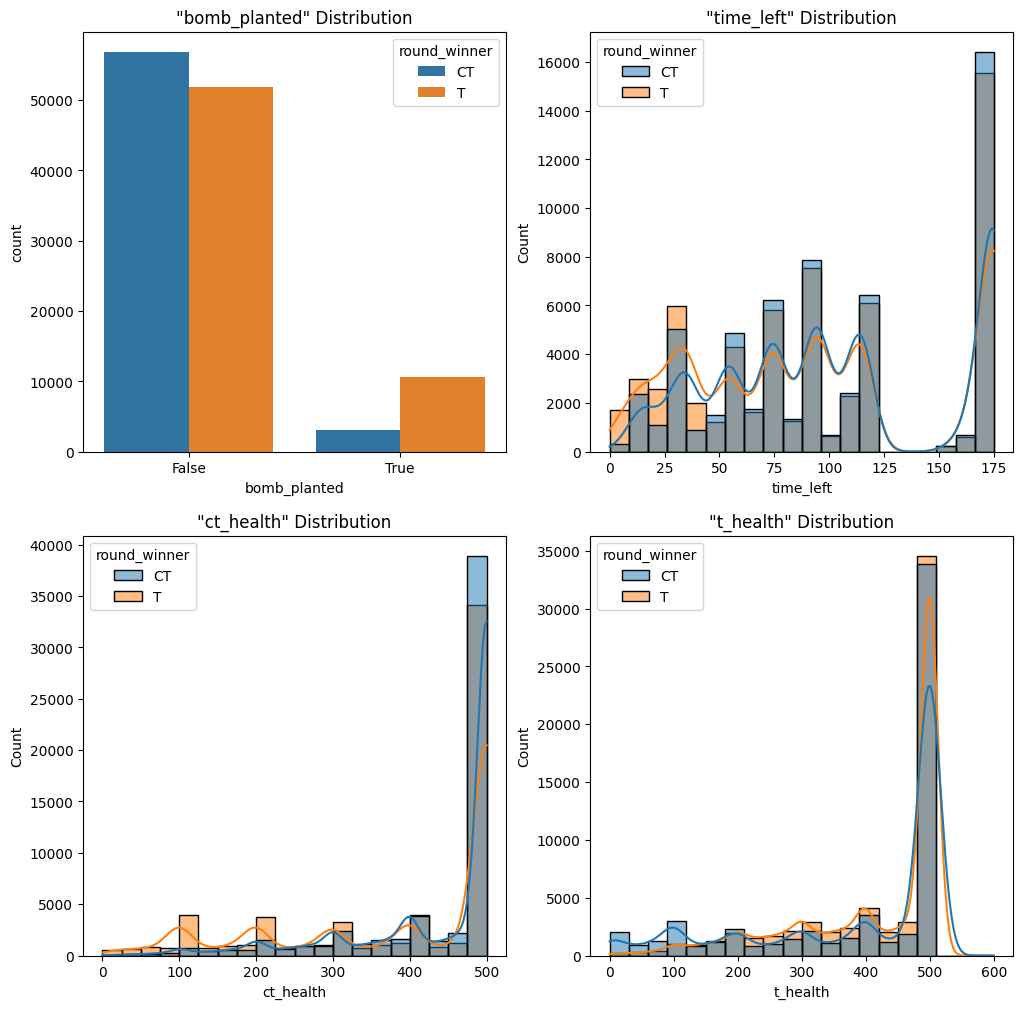

In [31]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title('"bomb_planted" Distribution')
sns.countplot(x='bomb_planted', data=data, hue='round_winner')
plt.subplot(2, 2, 3)
plt.title('"ct_health" Distribution')
sns.histplot(x='ct_health', data=data, hue='round_winner',bins=20, kde=True, color='red', alpha=0.5, linewidth=1, edgecolor='black')
plt.subplot(2, 2, 4)
plt.title('"t_health" Distribution')    
sns.histplot(x='t_health', data=data, hue='round_winner',bins=20, kde=True, color='blue', alpha=0.5, linewidth=1, edgecolor='black')
plt.subplot(2, 2, 2)
plt.title('"time_left" Distribution')
sns.histplot(x='time_left', data=data, hue='round_winner',bins=20, kde=True, color='green', alpha=0.5, linewidth=1, edgecolor='black')
plt.show()

In [32]:
# If the bomb is not planted, the CT team wins more rounds than the T team however, 
# if the bomb is planted, the T team wins more rounds than the CT team.   

# Most of the game has bomb not planted and the CT team wins more rounds than the T team.

# The health distribution of both teams is almost similar. The T team has a slight advantage in terms of health.

# Time left distribution is also similar for both teams. The T team has a slight advantage in terms of time left.
# Time left is less than 40, the T team wins more rounds than the CT team and if time left is more than 40, 
# the CT team wins more rounds than the T team.
# Most games have time less than 125 or greater than 160.

<Figure size 800x800 with 0 Axes>

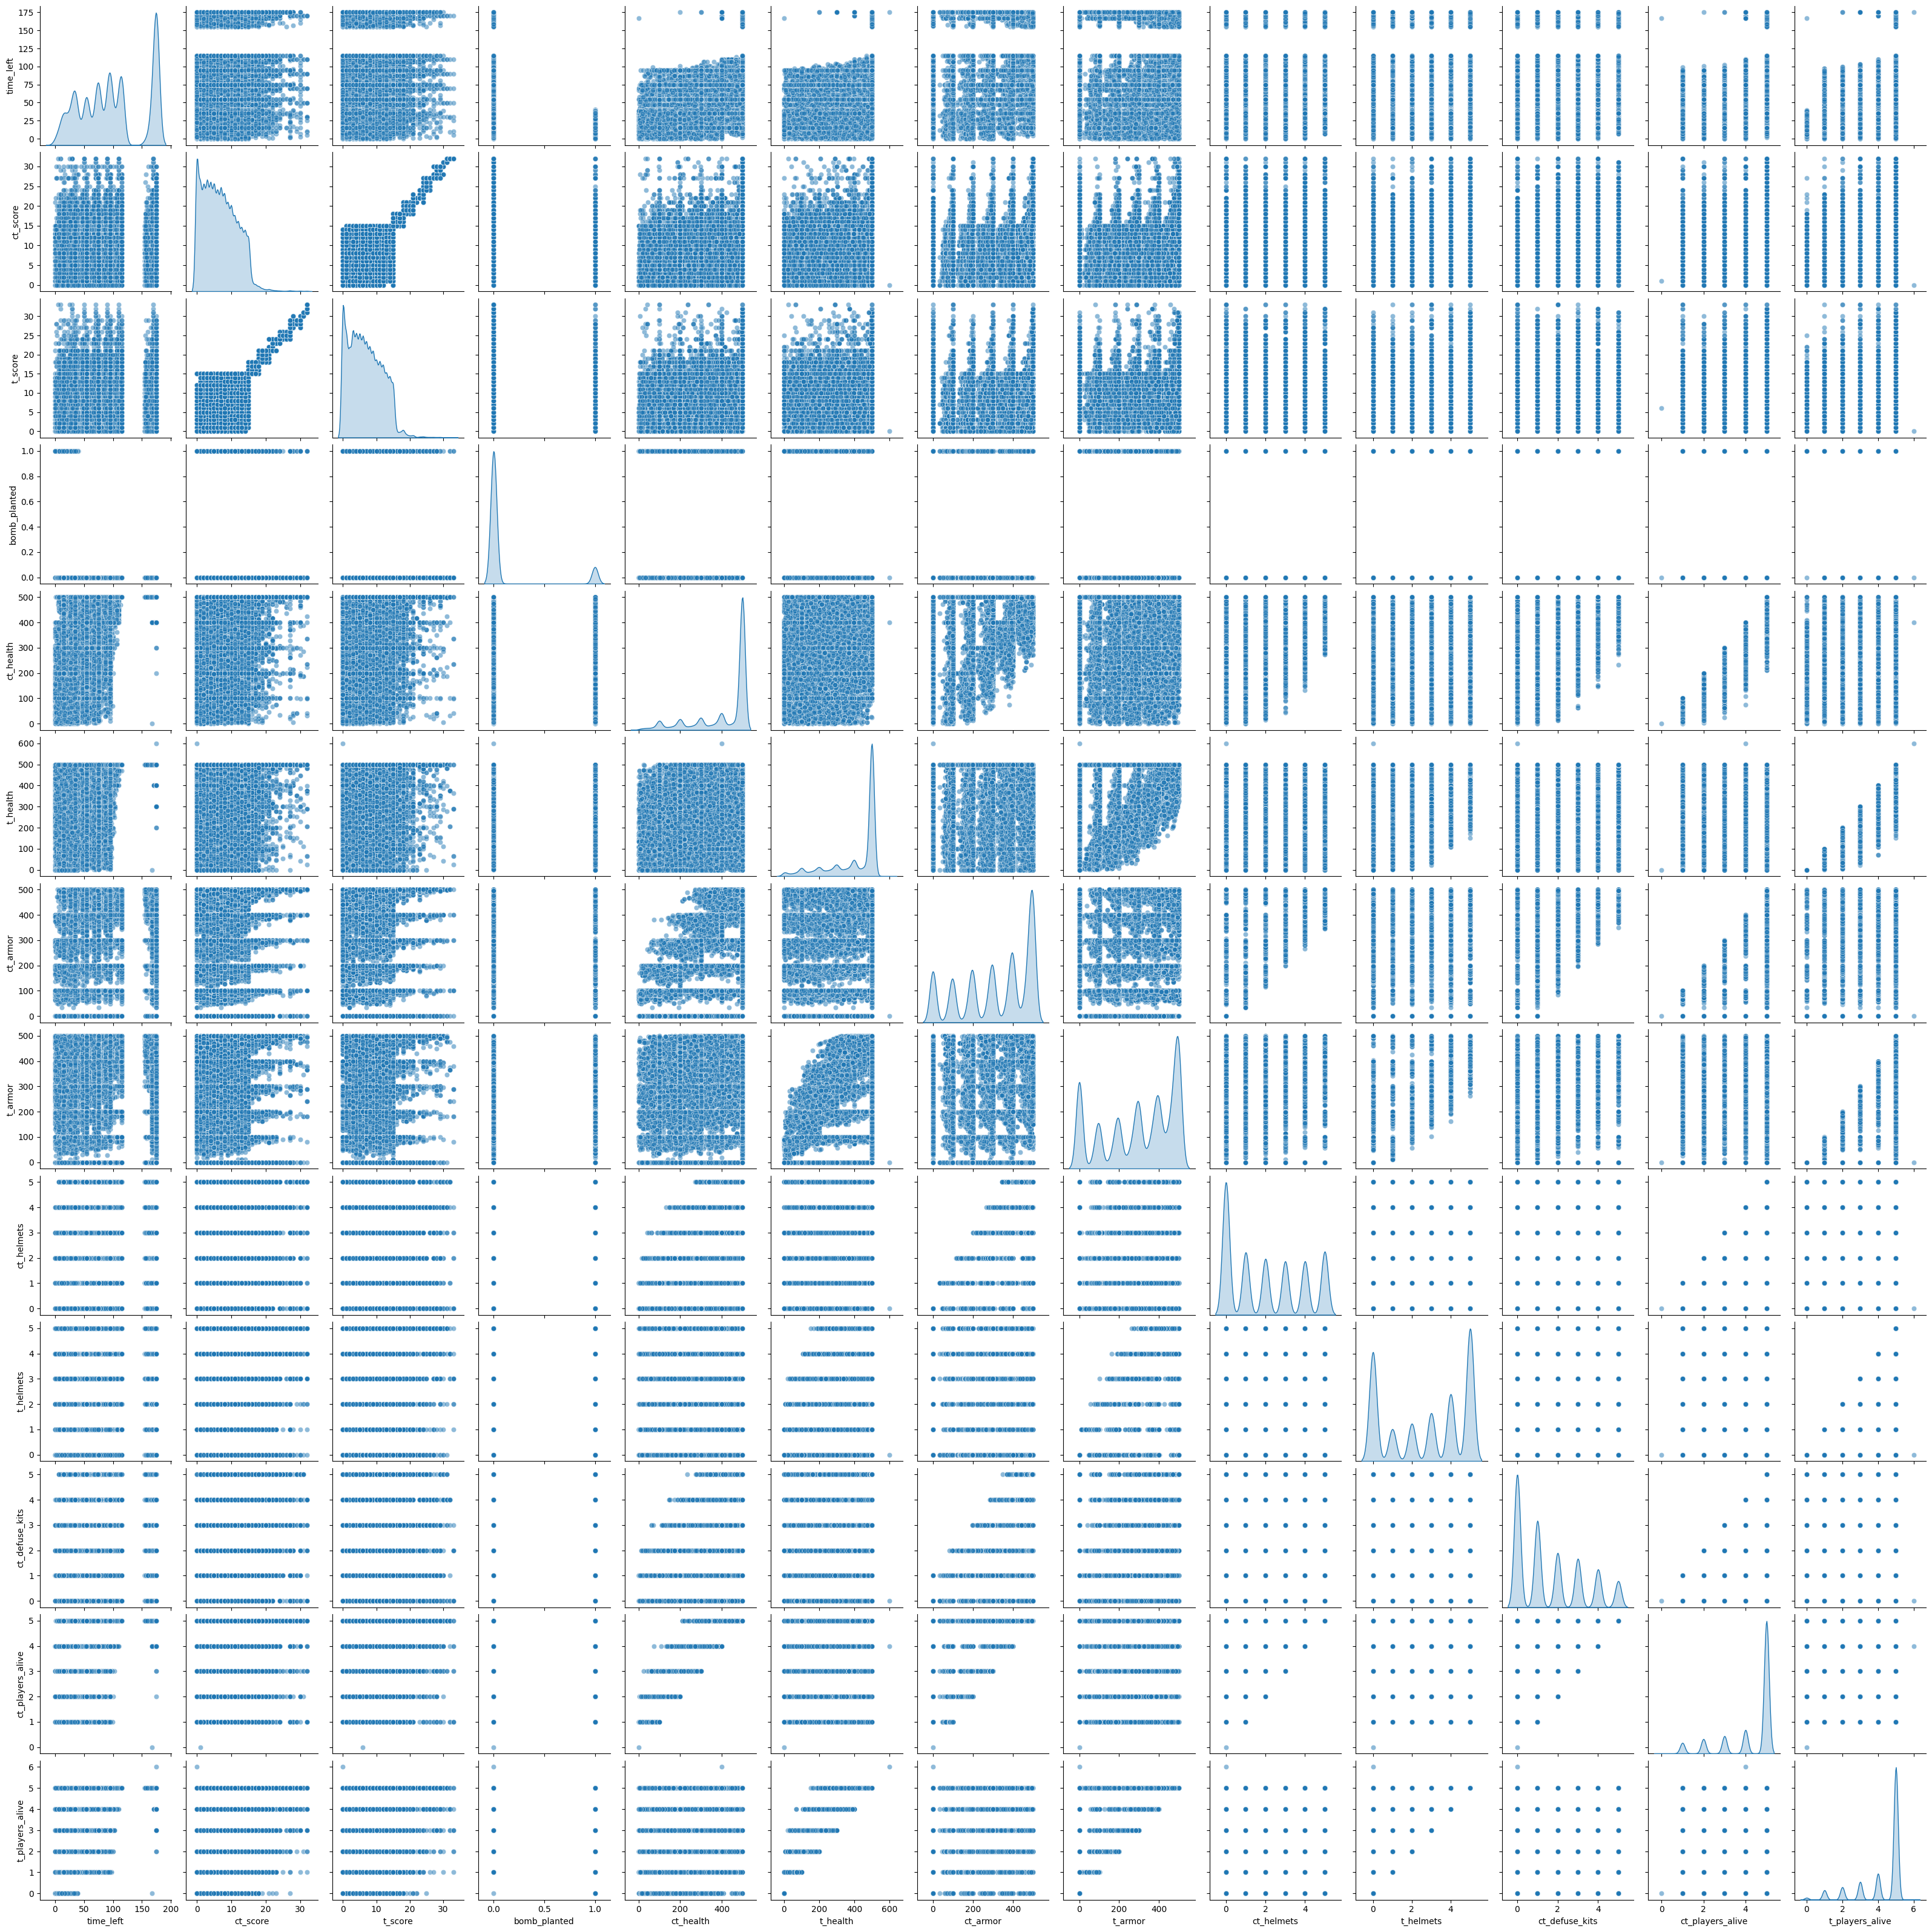

In [57]:
plt.figure(figsize=(8, 8))
sns.pairplot(data=data[df_non_money_non_wepons_columns.values.tolist() + ['round_winner']], diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

In [ ]:
# ct_score and t_score are highly correlated with each other. We can remove one of them to reduce multicollinearity.


In [58]:
plt.figure(figsize=(10, 10))
sns.heatmap(data[df_non_money_non_wepons_columns.values.tolist() + ['round_winner']], cmap='coolwarm', linewidths=2,annot=True)
plt.show()

ValueError: could not convert string to float: 'CT'

<Figure size 1000x1000 with 0 Axes>

['time_left',
 'ct_score',
 't_score',
 'bomb_planted',
 'ct_health',
 't_health',
 'ct_armor',
 't_armor',
 'ct_helmets',
 't_helmets',
 'ct_defuse_kits',
 'ct_players_alive',
 't_players_alive',
 'round_winner']